In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations by creating the variables and saving and zipping them to a file. 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


644

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list. Enumerate gets the index of the city for logging purposes. 
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes. This is checking if we hit the 50 count mark and if so keep going, if not start over. 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city. This is concatenating the name
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities. Try-request method is like iferror, just skip and keep going. 
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dudinka
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | sfantu gheorghe
Processing Record 5 of Set 1 | sept-iles
Processing Record 6 of Set 1 | batticaloa
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | pachino
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | necochea
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | bambous virieux
Processing Record 13 of Set 1 | alyangula
Processing Record 14 of Set 1 | portel
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | sobolevo
Processing Record 17 of Set 1 | gaoual
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | tevaitoa
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | lardos
Processing Record 22 of Set 1 | broken hill
Processing Record 23 of 

Processing Record 36 of Set 4 | yerbogachen
Processing Record 37 of Set 4 | ribeira grande
Processing Record 38 of Set 4 | champerico
Processing Record 39 of Set 4 | tabory
Processing Record 40 of Set 4 | omboue
Processing Record 41 of Set 4 | puerto del rosario
Processing Record 42 of Set 4 | acarau
Processing Record 43 of Set 4 | shitanjing
Processing Record 44 of Set 4 | nandura
Processing Record 45 of Set 4 | alofi
Processing Record 46 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 47 of Set 4 | changying
Processing Record 48 of Set 4 | katsiveli
City not found. Skipping...
Processing Record 49 of Set 4 | portland
Processing Record 50 of Set 4 | saskylakh
Processing Record 1 of Set 5 | clyde river
Processing Record 2 of Set 5 | vila velha
Processing Record 3 of Set 5 | nha trang
Processing Record 4 of Set 5 | beringovskiy
Processing Record 5 of Set 5 | ekuvukeni
Processing Record 6 of Set 5 | saleaula
City not found. Skipping...
Processing Record 7 of Set 5 | 

Processing Record 27 of Set 8 | burica
City not found. Skipping...
Processing Record 28 of Set 8 | cuiluan
Processing Record 29 of Set 8 | olgod
Processing Record 30 of Set 8 | pilao arcado
City not found. Skipping...
Processing Record 31 of Set 8 | villazon
Processing Record 32 of Set 8 | paysandu
Processing Record 33 of Set 8 | hede
Processing Record 34 of Set 8 | gainesville
Processing Record 35 of Set 8 | mareeba
Processing Record 36 of Set 8 | yongan
Processing Record 37 of Set 8 | conde
Processing Record 38 of Set 8 | la rioja
Processing Record 39 of Set 8 | boyabat
Processing Record 40 of Set 8 | kudahuvadhoo
Processing Record 41 of Set 8 | rincon
Processing Record 42 of Set 8 | bukama
Processing Record 43 of Set 8 | daru
Processing Record 44 of Set 8 | khilok
Processing Record 45 of Set 8 | guarapari
Processing Record 46 of Set 8 | niagara falls
Processing Record 47 of Set 8 | kebemer
City not found. Skipping...
Processing Record 48 of Set 8 | parbhani
Processing Record 49 of S

Processing Record 13 of Set 12 | yayva
Processing Record 14 of Set 12 | springfield
Processing Record 15 of Set 12 | pinheiro machado
Processing Record 16 of Set 12 | minab
Processing Record 17 of Set 12 | tura
Processing Record 18 of Set 12 | karasjok
Processing Record 19 of Set 12 | batemans bay
Processing Record 20 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 21 of Set 12 | tsaratanana
Processing Record 22 of Set 12 | kieta
Processing Record 23 of Set 12 | hovd
Processing Record 24 of Set 12 | ambilobe
Processing Record 25 of Set 12 | lorengau
Processing Record 26 of Set 12 | faya
Processing Record 27 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 28 of Set 12 | qurayyat
Processing Record 29 of Set 12 | sao joao dos patos
Processing Record 30 of Set 12 | nome
Processing Record 31 of Set 12 | paradwip
City not found. Skipping...
Processing Record 32 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 33 of Set 12 | ravar
Proc

In [9]:
len(city_data)

583

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dudinka,69.4058,86.1778,41.36,88,100,11.83,RU,2021-09-18 19:22:07
1,Atuona,-9.8000,-139.0333,77.94,75,2,18.28,PF,2021-09-18 19:22:08
2,Punta Arenas,-53.1500,-70.9167,48.31,66,40,11.50,CL,2021-09-18 19:22:08
3,Sfantu Gheorghe,45.8667,25.7833,55.81,81,49,3.76,RO,2021-09-18 19:22:09
4,Sept-Iles,50.2001,-66.3821,69.26,51,75,7.00,CA,2021-09-18 19:22:05
5,Batticaloa,7.7102,81.6924,79.59,84,97,3.74,LK,2021-09-18 19:22:09
6,Kodiak,57.7900,-152.4072,53.11,47,1,10.36,US,2021-09-18 19:22:10
7,Pachino,36.7186,15.0907,80.60,78,10,10.74,IT,2021-09-18 19:22:10
8,Vaini,-21.2000,-175.2000,73.56,94,75,9.22,TO,2021-09-18 19:22:11
9,Necochea,-38.5473,-58.7368,68.04,62,8,11.16,AR,2021-09-18 19:22:11


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dudinka,RU,2021-09-18 19:22:07,69.4058,86.1778,41.36,88,100,11.83
1,Atuona,PF,2021-09-18 19:22:08,-9.8000,-139.0333,77.94,75,2,18.28
2,Punta Arenas,CL,2021-09-18 19:22:08,-53.1500,-70.9167,48.31,66,40,11.50
3,Sfantu Gheorghe,RO,2021-09-18 19:22:09,45.8667,25.7833,55.81,81,49,3.76
4,Sept-Iles,CA,2021-09-18 19:22:05,50.2001,-66.3821,69.26,51,75,7.00
5,Batticaloa,LK,2021-09-18 19:22:09,7.7102,81.6924,79.59,84,97,3.74
6,Kodiak,US,2021-09-18 19:22:10,57.7900,-152.4072,53.11,47,1,10.36
7,Pachino,IT,2021-09-18 19:22:10,36.7186,15.0907,80.60,78,10,10.74
8,Vaini,TO,2021-09-18 19:22:11,-21.2000,-175.2000,73.56,94,75,9.22
9,Necochea,AR,2021-09-18 19:22:11,-38.5473,-58.7368,68.04,62,8,11.16


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

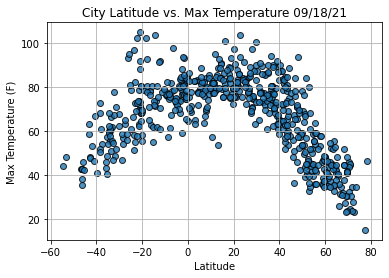

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


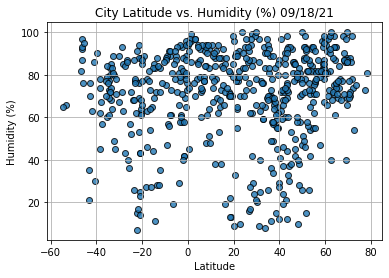

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

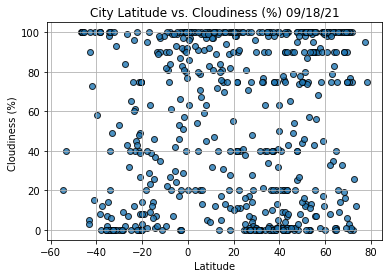

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%) ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%) ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()